# 📊 Excel Analysis Report

**File:** `Business Accounting.xlsx`


## 🛡️ Security Analysis

**Risk Level:** 🟡 MEDIUM

### Detected Threats:
- **DANGEROUS_FORMULA**: Potentially dangerous function HYPERLINK detected


## 📋 Structural Analysis

**Total Sheets:** 10
**Total Cells with Data:** 6,959
**Named Ranges:** 0
**Complexity Score:** 32/100

### Sheet Details:

| Sheet Name | Hidden | Rows | Columns | Formulas |
|------------|--------|------|---------|----------|
| Yiriden Transactions 2025 | False | 42 | 9 | 2 |
| Yiriden Transactions 2023 | True | 1,021 | 11 | 815 |
| Yiriden 2023 Loans | True | 122 | 14 | 0 |
| Sanoun Transactions 2024 | True | 255 | 28 | 2 |
| Sanoun Transactions 2025 | True | 264 | 11 | 2 |
| 2024 Shea butter shipping | True | 1,001 | 5 | 13 |
| Yiriden mileages | True | 2 | 3 | 0 |
| Truck Revenue Projections | True | 39 | 9 | 39 |
| Yiriden 2022 | True | 1,000 | 26 | 3 |
| Real Estate - Horton Rd | False | 1,001 | 26 | 1 |


## 🔗 Formula Analysis

**Max Dependency Depth:** 0 levels
**Formula Complexity Score:** 1837.01/100
**Circular References:** ✅ No
**Volatile Formulas:** 0
**External References:** 0


In [1]:
import pandas as pd
from pathlib import Path

# Load the Excel file (path relative to repo root)
excel_path = Path("test_assets/collection/business-accounting/Business Accounting.xlsx")
sheet_index = 2

print(f"Loading data from: {excel_path}")
print(f"Loading sheet at index: {sheet_index}")

try:
    # First, get information about all sheets
    xl_file = pd.ExcelFile(excel_path)
    sheet_names = xl_file.sheet_names
    print(f"\nAvailable sheets: {sheet_names}")

    if sheet_index >= len(sheet_names):
        print(f"\nError: Sheet index {sheet_index} is out of range. File has {len(sheet_names)} sheets.")
        print("Please use --sheet-index with a value between 0 and {}".format(len(sheet_names)-1))
        df = None
    else:
        # Load the specified sheet
        selected_sheet = sheet_names[sheet_index]
        print(f"\nLoading sheet: '{selected_sheet}'")

        df = pd.read_excel(excel_path, sheet_name=sheet_index)
        print(f"\nLoaded data with shape: {df.shape}")
        print(f"Columns: {list(df.columns)}")

        # Display first few rows
        print("\nFirst 5 rows:")
        display(df.head())

        # Basic info
        print("\nData types:")
        print(df.dtypes)

except Exception as e:
    print(f"Error loading Excel file: {e}")
    df = None


Loading data from: test_assets/collection/business-accounting/Business Accounting.xlsx
Loading sheet at index: 2

Available sheets: ['Yiriden Transactions 2025', 'Yiriden Transactions 2023', 'Yiriden 2023 Loans', 'Sanoun Transactions 2024', 'Sanoun Transactions 2025', '2024 Shea butter shipping', 'Yiriden mileages', 'Truck Revenue Projections', 'Yiriden 2022', 'Real Estate - Horton Rd']

Loading sheet: 'Yiriden 2023 Loans'

Loaded data with shape: (121, 14)
Columns: ['Lender', 'Amount', 'Term', 'Rate', 'Payment', 'Origination Date', 'Truck', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13']

First 5 rows:


,Lender,Amount,Term,Rate,Payment,Origination Date,Truck,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,BHG,89395.0,120.0,0.1824,1624.60,2023-04-18,Actros 1,NaN,Payment #,Date,Amount,Interest,Principal,Balance
1,Fidelity 401(k) loan,36000.0,59.0,0.0925,350.63,2023-07-16,Actros 2,NaN,1,2023-05-20 00:00:00,1624.6,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,2,2023-06-20 00:00:00,1624.6,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,3,2023-07-20 00:00:00,1624.6,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,4,2023-08-20 00:00:00,1624.6,NaN,NaN,NaN



Data types:
Lender                      object
Amount                     float64
Term                       float64
Rate                       float64
Payment                    float64
Origination Date    datetime64[ns]
Truck                       object
Unnamed: 7                 float64
Unnamed: 8                  object
Unnamed: 9                  object
Unnamed: 10                 object
Unnamed: 11                 object
Unnamed: 12                 object
Unnamed: 13                 object
dtype: object


In [2]:
# Query interface for formula dependency analysis
# The pipeline has already analyzed all formulas and cached the results

import pickle
from pathlib import Path
from spreadsheet_analyzer.graph_db.query_interface import create_enhanced_query_interface

# Load cached formula analysis
cache_file = Path(r".pipeline_cache/Business Accounting_formula_analysis.pkl")
with open(cache_file, 'rb') as f:
    formula_analysis = pickle.load(f)

query_interface = create_enhanced_query_interface(formula_analysis)

# Convenience functions for graph queries
def get_cell_dependencies(sheet, cell_ref):
    """Get complete dependency information for a specific cell."""
    result = query_interface.get_cell_dependencies(sheet, cell_ref)
    print(f"\nCell {sheet}!{cell_ref}:")
    print(f"  Has formula: {result.has_formula}")
    if result.formula:
        print(f"  Formula: {result.formula}")
    if result.direct_dependencies:
        print(f"  Direct dependencies: {', '.join(result.direct_dependencies[:5])}")
        if len(result.direct_dependencies) > 5:
            print(f"    ...and {len(result.direct_dependencies) - 5} more")
    if result.direct_dependents:
        print(f"  Cells that depend on this: {', '.join(result.direct_dependents[:5])}")
        if len(result.direct_dependents) > 5:
            print(f"    ...and {len(result.direct_dependents) - 5} more")
    return result

def find_cells_affecting_range(sheet, start_cell, end_cell):
    """Find all cells that affect any cell within the specified range."""
    result = query_interface.find_cells_affecting_range(sheet, start_cell, end_cell)
    print(f"\nCells affecting range {sheet}!{start_cell}:{end_cell}:")
    for cell, deps in list(result.items())[:5]:
        print(f"  {cell} depends on: {', '.join(deps[:3])}")
        if len(deps) > 3:
            print(f"    ...and {len(deps) - 3} more")
    if len(result) > 5:
        print(f"  ...and {len(result) - 5} more cells")
    return result

def get_formula_statistics():
    """Get comprehensive statistics about formulas in the workbook."""
    stats = query_interface.get_formula_statistics_with_ranges()
    print("\nFormula Statistics:")
    print(f"  Total formulas: {stats['total_formulas']:,}")
    print(f"  Formulas with dependencies: {stats['formulas_with_dependencies']:,}")
    print(f"  Unique cells referenced: {stats['unique_cells_referenced']:,}")
    print(f"  Max dependency depth: {stats['max_dependency_depth']} levels")
    print(f"  Circular references: {stats['circular_reference_chains']}")
    print(f"  Formula complexity score: {stats['complexity_score']}/100")
    return stats

def find_empty_cells_in_formula_ranges(sheet):
    """Find empty cells that are part of formula ranges."""
    result = query_interface.find_empty_cells_in_formula_ranges(sheet)
    print(f"\nEmpty cells in formula ranges for sheet '{sheet}':")
    if result:
        print(f"  Found {len(result)} empty cells")
        # Group by rows for display
        rows = {}
        for cell in list(result)[:20]:
            row_num = ''.join(filter(str.isdigit, cell))
            if row_num not in rows:
                rows[row_num] = []
            rows[row_num].append(cell)
        for row, cells in list(rows.items())[:5]:
            print(f"  Row {row}: {', '.join(cells)}")
        if len(result) > 20:
            print(f"  ...and {len(result) - 20} more")
    else:
        print("  No empty cells found in formula ranges")
    return result


## 🔍 Formula Dependency Query Tools

The deterministic pipeline has analyzed all formulas and created a dependency graph. You can query this graph using the following tools:

### Available Tools:

1. **get_cell_dependencies** - Analyze what a cell depends on and what depends on it
   - Parameters: `sheet` (e.g., "Summary"), `cell_ref` (e.g., "D2")

2. **find_cells_affecting_range** - Find all cells that affect a specific range
   - Parameters: `sheet`, `start_cell`, `end_cell`

3. **find_empty_cells_in_formula_ranges** - Find gaps in data that formulas reference
   - Parameters: `sheet`

4. **get_formula_statistics** - Get overall statistics about formulas
   - No parameters needed

5. **find_circular_references** - Find all circular reference chains
   - No parameters needed

### Usage:
These tools are available through the tool-calling interface. Each query will be documented in a markdown cell showing both the query and its results.


In [3]:
# Remove unnamed columns that are empty or unnecessary
df_clean = df.drop([col for col in df.columns if 'Unnamed' in col], axis=1)

# Basic statistics of the loan data
print("=== Loan Statistics ===")
print("\nNumerical columns summary:")
print(df_clean.describe())

print("\n=== Loan Portfolio Analysis ===")
print("\nNumber of unique lenders:", df_clean['Lender'].nunique())
print("\nTotal loan amount: ${:,.2f}".format(df_clean['Amount'].sum()))
print("\nAverage loan amount: ${:,.2f}".format(df_clean['Amount'].mean()))

# Group by lender
print("\nLoan amounts by lender:")
lender_summary = df_clean.groupby('Lender').agg({
    'Amount': ['count', 'sum', 'mean'],
    'Rate': 'mean'
}).round(2)
print(lender_summary)

# Analyze loan terms and rates
print("\nInterest Rate Statistics:")
print(df_clean['Rate'].describe())

=== Loan Statistics ===

Numerical columns summary:
             Amount        Term      Rate      Payment     Origination Date
count      2.000000    2.000000  2.000000     2.000000                    2
mean   62697.500000   89.500000  0.137450   987.615000  2023-06-01 12:00:00
min    36000.000000   59.000000  0.092500   350.630000  2023-04-18 00:00:00
25%    49348.750000   74.250000  0.114975   669.122500  2023-05-10 06:00:00
50%    62697.500000   89.500000  0.137450   987.615000  2023-06-01 12:00:00
75%    76046.250000  104.750000  0.159925  1306.107500  2023-06-23 18:00:00
max    89395.000000  120.000000  0.182400  1624.600000  2023-07-16 00:00:00
std    37755.966581   43.133514  0.063569   900.832826                  NaN

=== Loan Portfolio Analysis ===

Number of unique lenders: 2

Total loan amount: $125,395.00

Average loan amount: $62,697.50

Loan amounts by lender:
                     Amount                    Rate
                      count      sum     mean  mean
Lender  

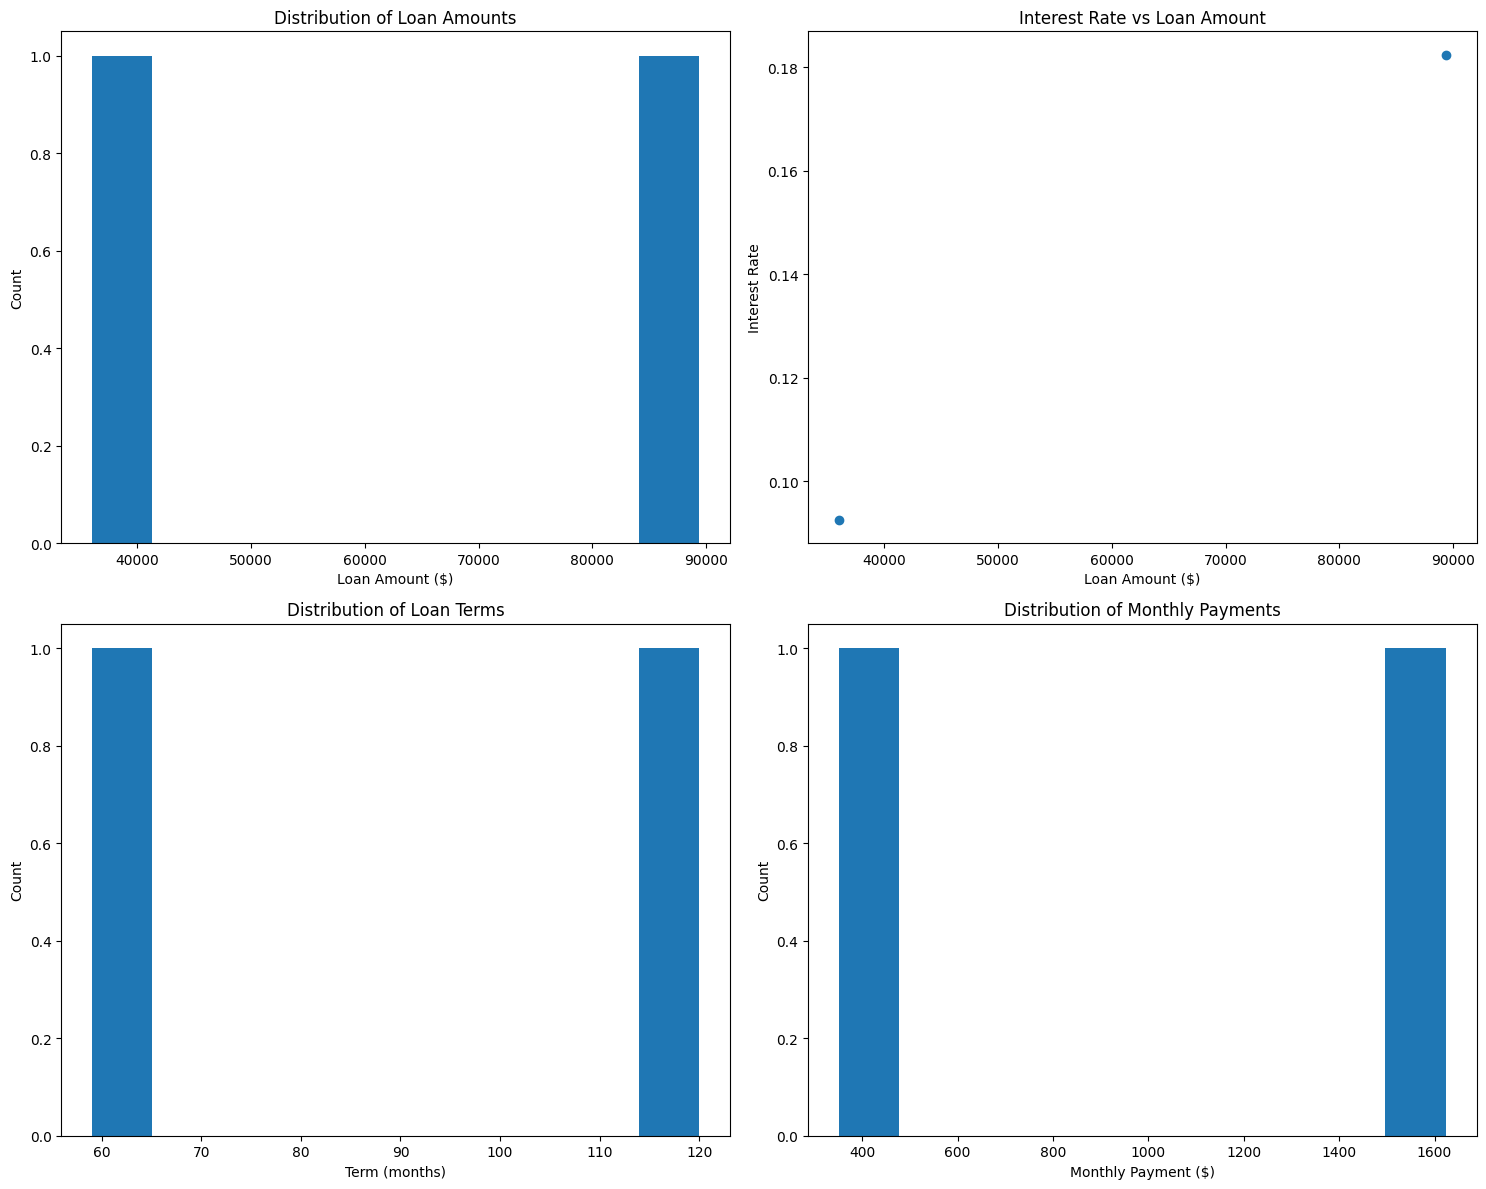


=== Temporal Analysis ===

Loan Origination Timeline:
                   Lender   Amount    Rate Origination Date
0                     BHG  89395.0  0.1824       2023-04-18
1    Fidelity 401(k) loan  36000.0  0.0925       2023-07-16
2                     NaN      NaN     NaN              NaT
3                     NaN      NaN     NaN              NaT
4                     NaN      NaN     NaN              NaT
..                    ...      ...     ...              ...
116                   NaN      NaN     NaN              NaT
117                   NaN      NaN     NaN              NaT
118                   NaN      NaN     NaN              NaT
119                   NaN      NaN     NaN              NaT
120                   NaN      NaN     NaN              NaT

[121 rows x 4 columns]


In [4]:
import matplotlib.pyplot as plt

# Create subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# 1. Loan Amount Distribution
ax1.hist(df_clean['Amount'], bins=10)
ax1.set_title('Distribution of Loan Amounts')
ax1.set_xlabel('Loan Amount ($)')
ax1.set_ylabel('Count')

# 2. Interest Rate vs Loan Amount
ax2.scatter(df_clean['Amount'], df_clean['Rate'])
ax2.set_title('Interest Rate vs Loan Amount')
ax2.set_xlabel('Loan Amount ($)')
ax2.set_ylabel('Interest Rate')

# 3. Term Distribution
ax3.hist(df_clean['Term'], bins=10)
ax3.set_title('Distribution of Loan Terms')
ax3.set_xlabel('Term (months)')
ax3.set_ylabel('Count')

# 4. Monthly Payment Distribution
ax4.hist(df_clean['Payment'], bins=10)
ax4.set_title('Distribution of Monthly Payments')
ax4.set_xlabel('Monthly Payment ($)')
ax4.set_ylabel('Count')

plt.tight_layout()
plt.show()

# Temporal analysis
print("\n=== Temporal Analysis ===")
print("\nLoan Origination Timeline:")
timeline = df_clean.sort_values('Origination Date')
print(timeline[['Lender', 'Amount', 'Rate', 'Origination Date']])

In [5]:
# Analyze truck collateral
print("=== Truck Collateral Analysis ===")
print("\nLoans by truck:")
truck_analysis = df_clean.groupby('Truck').agg({
    'Amount': ['count', 'sum'],
    'Rate': 'mean',
    'Payment': 'sum'
}).round(2)

print(truck_analysis)

# Check for any missing truck assignments
print("\nLoans without assigned trucks:")
print(df_clean[df_clean['Truck'].isna()][['Amount', 'Lender', 'Rate']])

=== Truck Collateral Analysis ===

Loans by truck:
         Amount           Rate  Payment
          count      sum  mean      sum
Truck                                  
Actros 1      1  89395.0  0.18  1624.60
Actros 2      1  36000.0  0.09   350.63

Loans without assigned trucks:
     Amount Lender  Rate
2       NaN    NaN   NaN
3       NaN    NaN   NaN
4       NaN    NaN   NaN
5       NaN    NaN   NaN
6       NaN    NaN   NaN
..      ...    ...   ...
116     NaN    NaN   NaN
117     NaN    NaN   NaN
118     NaN    NaN   NaN
119     NaN    NaN   NaN
120     NaN    NaN   NaN

[119 rows x 3 columns]
